In [3]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
import csv
import pandas as pd

In [8]:
with open('d_error_200.csv', 'r') as f:
    reader = csv.reader(f)
    your_list = list(reader)
    
data3 = []
for a in your_list:
    X = [j for j in a]
    data3.append([float(i) for i in X])

data3 = np.array(data3)
data3 = np.array([np.mean(data3[i, :]) for i in range(data3.shape[0])])

In [84]:
d_pred_real = np.hstack((data1, data2, data3))

In [97]:
%config InlineBackend.figure_format = 'svg'
params = {'figure.figsize': [5, 5],
    'axes.labelsize': 20,
    'axes.titlesize':24,
    'font.size': 20,
    'legend.fontsize': 16,
    'xtick.labelsize': 16,
    'ytick.labelsize': 16
}
plt.rcParams.update(params)

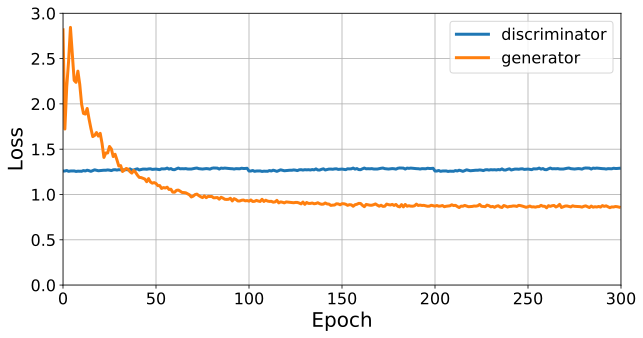

In [126]:
plt.figure(figsize=(10,5))
plt.plot(range(d_error.shape[0]), d_error, LineWidth=3, label='discriminator')
plt.plot(range(g_error.shape[0]), g_error, LineWidth=3, label='generator')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.xlim(0, 300)
plt.ylim(0, 3)
plt.grid(True)
plt.legend()
plt.savefig('loss_0-299.pdf', format='pdf', dpi=300, bbox_inches='tight')
plt.show()

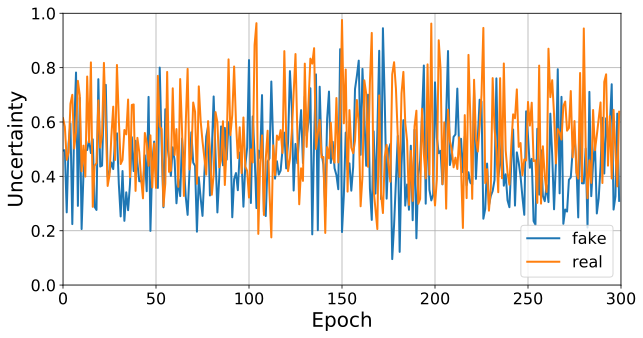

In [127]:
plt.figure(figsize=(10,5))
plt.plot(range(d_pred_fake.shape[0]), d_pred_fake, LineWidth=2, label='fake')
plt.plot(range(d_pred_real.shape[0]), d_pred_real, LineWidth=2, label='real')
plt.xlabel('Epoch')
plt.ylabel('Uncertainty')
plt.xlim(0, 300)
plt.ylim(0, 1)
plt.grid(True)
plt.legend()
plt.savefig('uncertainty_0-299.pdf', format='pdf', dpi=300, bbox_inches='tight')
plt.show()

In [118]:
data_full = np.transpose(np.vstack((d_error, g_error, d_pred_fake, d_pred_real)))

In [119]:
data_df = pd.DataFrame(data_full)
data_df.columns = ['d_error', 'g_error', 'd_pred_fake', 'd_pred_real']
data_df.to_csv('data.csv')